In [1]:
import numpy
import pandas as pd
from IPython.display import display
import matplotlib
import matplotlib.pylab as plt
matplotlib.style.use("ggplot")
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [4]:
train = pd.read_csv("./data/titanic/train.csv")
display(train.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print(len(train)) # 教師データ件数
print("")
print(train.dtypes) # データの型の確認
print("")
print(train.isnull().sum()) # 欠損値の確認

891

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
# 性別をラベル化

label_encoder_sex = preprocessing.LabelEncoder()
train["Sex_l"] = label_encoder_sex.fit_transform(train["Sex"])
display(train.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_l
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [10]:
train = train.drop(["Age", "Fare", "Embarked"], axis=1) # 欠損があるカラムを削除
print(len(train))
display(train.head())

891


,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Cabin,Sex_l
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,NaN,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,C123,0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,NaN,1


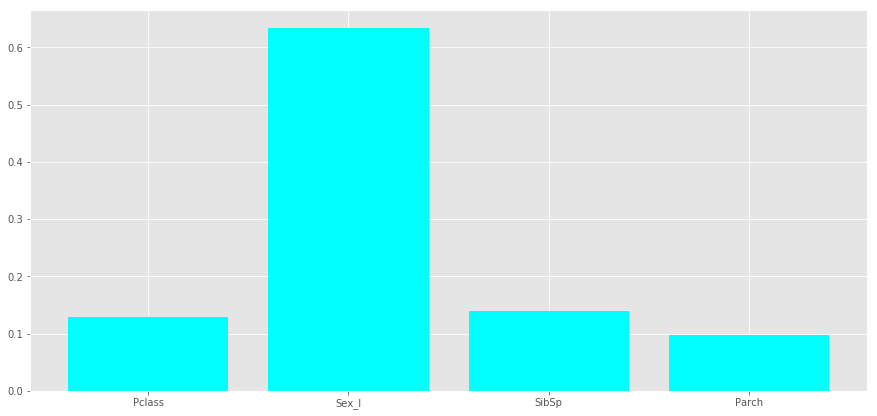

変数重要度:  [ 0.1295005   0.63301421  0.13926776  0.09821753]
混合行列: 
[[223  43]
 [ 20 114]]
教師データ:  0.8425
バリデーションデータ:  0.769387755102


In [12]:
# ランダムフォレストで変数重要度と予測精度を確認してみる

df = train[:400] # 教師データの一部
t = df["Survived"]
x_label = ["Pclass", "Sex_l", "SibSp", "Parch"]
x = df[x_label]
model = RandomForestClassifier()
model.fit(x, t)

# 変数重要度プロット
left = list(range(1, len(x_label)+1))
height = model.feature_importances_
plt.figure(figsize=(15,7))
plt.bar(left, height, tick_label=x_label, color="cyan")
plt.show()
print("変数重要度: ", model.feature_importances_) # 変数重要度
y = model.predict(x)
print("混合行列: ")
print(confusion_matrix(y, t)) # 混合行列
print("教師データ: ", accuracy_score(y, t)) # 正解度

# 予測精度
df = train[401:] # 教師データの残りの部分
t = df["Survived"]
x = df[x_label]
y = model.predict(x)
result = pd.DataFrame({"t": t.values, "y": y})
result["accuracy"] = 1
result["accuracy"] = result["accuracy"].where(result["t"] == result["y"], 0)
score = sum(result["accuracy"])/len(result)
print("バリデーションデータ: ", score)